**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
#install packages 

import numpy as np
import pandas as pd
from types import SimpleNamespace
import matplotlib.pyplot as plt
from matplotlib import cm #used for 3d plots
from scipy import optimize 
from scipy.optimize import minimize
%load_ext autoreload
%autoreload 2

%matplotlib inline

## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [2]:
# write your code here

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

In [3]:
# write your code here


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


In [4]:
# write your code here

**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

In [5]:
# write your code here

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

In [6]:
# write your code here

**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [7]:
# write your code here  

## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In [110]:
# write your code here

import numpy as np
from scipy import optimize

import pandas as pd 
import matplotlib.pyplot as plt

# Baseline parameters
eta = 0.5   # Elasticity of demand
w = 1.0     # Wages

# Lamda functions for the given equations
y = lambda l : l                                                          # Amount of haircuts y = l
price = lambda  y : k * (y ** - eta)                                      # Price function
profits1 = lambda l : price(y(l)) * y(l) - w * (l ** (1 - eta)) - w * l   # Profit function 1
profits2 = lambda  l : k * (l ** (1 - eta)) - w * l                       # Profit function 2


l_test = lambda kap : (((1 - eta) * kap) / w) ** (1 / eta)     # Lamda function to check maximizing l from the model

# Define kappa within given set, the code is set up such that this array can be changed
kappa = [1.0 , 2.0]

# Define arrays, where we will store the results of  the numerical analysis and the models prediction for l which maximizes profit
opt = []   # Array with numerically calculated optimal l values
check = [] # Array with l values found via theoretical model

# Define the function we want to minimize, setting negative profits to maximize actual profits
def Objective(l):
    return -profits2(l)

x0 = 1.0 # Initial guess for optimization function

bounds = [(0.0 , None)] # Bounds for l; we cannot hire less than 0 hairdressers, 
# Fractions might be argued as possible where hairdressers might not be working full-time


# Loop for calculation and storage of results
for k in kappa:
    res = optimize.minimize(Objective, x0 , method='SLSQP', bounds=bounds)
    check.append(l_test(k))
    opt.append(res.x[0])

# Loop to print out the collected data
# while this could be included in the previous loop, having a different loop for the printout allows for the possibility of editing the data
for i in range(len(kappa)):
    print ('\nFor kappa = %.1f:\n Numerical calculation:\n  l = %.2f , profits = %.2f\n With model solution:\n  l = %.2f , profits = %.2f'% ( kappa[i] , opt[i] , profits2(opt[i]) , check[i] , profits2(check[i])))

 


For kappa = 1.0:
 Numerical calculation:
  l = 0.25 , profits = 0.75
 With model solution:
  l = 0.25 , profits = 0.75

For kappa = 2.0:
 Numerical calculation:
  l = 1.00 , profits = 1.00
 With model solution:
  l = 0.25 , profits = 0.75


We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [9]:
# write your code here 

Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [10]:
# write your code here

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

In [11]:
# write your code here


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



In [12]:
# write your code here

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [2]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

In [3]:
#Test global minimum

griewank(np.zeros(2))

0.0

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

In [137]:
def global_optm(bounds, tolerance, K_warmup, max_K):
    # 1) Set tolerance and bounds
    tolerance > 0
    bounds = [np.array([-600, -600]), np.array([600, 600])]

    # 2) Set Iterations
    K_warmup > 0
    max_K > K_warmup

    # 3) Loop through k
    fopt = np.inf
    xopt = np.nan
    for k in range(max_K):
        # A) Draw k uniformly within chosen bounds
        np.random.seed(2023)
        xk = bounds[0] + (bounds[1] - bounds[0]) * np.random.uniform(size=(5000, 2))

        xs = np.empty((max_K, 2))
        fs = np.empty(max_K)

        # B) if k < K run optimizer
        if k < K_warmup:
            x_guess = xk[0, :]
            xk_star = optimize.minimize(griewank, x_guess, method='BFGS', tol=tolerance)
            xs[k] = xk_star.x
            fs[k] = xk_star.fun
        else:
            # C) calculate chi
            chi = 0.5 * (2 / (1 + np.exp((k - K_warmup)) / 100))

            # D) set x(0)
            xk[0] = chi * xk + (1 - chi) * xs
            xk[0] = np.squeeze(xk[0])  # set x0 to 1 dimension so that code can run without error

            # E) run optimizer
            xk_star = optimize.minimize(griewank, xk[0], method='BFGS', tol=tolerance)
            xs[k] = xk_star.x
            fs[k] = xk_star.fun

            # F) set x_star
            if xs.size == 0 or griewank(xk_star) <= griewank(xs):
                xs = xk_star
                fopt = fs[k]
                xopt = xs[k]

        # Print the results for each iteration
        print(f'{k + 1:4d}: x0 = ({xk[0][0]:7.2f},{xk[0][1]:7.2f})', end='')
        print(f' -> converged at ({xs[k][0]:7.2f},{xs[k][1]:7.2f}) with f = {fs[k]:12.8f}')

    # best solution
    print(f'\nbest solution:\n x = ({xopt[0]:7.2f},{xopt[1]:7.2f}) -> f = {fopt:12.8f}')


In [140]:
def global_optm(bounds, tolerance, K_warmup, max_K):
    # 1) Set tolerance and bounds
    assert tolerance > 0
    bounds = [np.array([-600, -600]), np.array([600, 600])]

    # 2) Set Iterations
    assert K_warmup > 0
    assert max_K > K_warmup

    # 3) Loop through k
    fopt = np.inf
    xopt = np.nan
    xs = np.empty((max_K, 2))
    fs = np.empty(max_K)

    for k in range(max_K):
        # A) Draw k uniformly within chosen bounds
        np.random.seed(2023)
        xk = bounds[0] + (bounds[1] - bounds[0]) * np.random.uniform(size=(5000, 2))

        # B) if k < K run optimizer
        if k < K_warmup:
            x_guess = xk[0, :]
            xk_star = optimize.minimize(griewank, x_guess, method='BFGS', tol=tolerance)
            xs[k] = xk_star.x
            fs[k] = xk_star.fun
        else:
            # C) calculate chi
            chi = 0.5 * (2 / (1 + np.exp((k - K_warmup)) / 100))

            # D) set x(0)
            xk[0] = chi * xk + (1 - chi) * xs[k - 1]
            xk[0] = np.squeeze(xk[0])  # set x0 to 1 dimension so that code can run without error

            # E) run optimizer
            xk_star = optimize.minimize(griewank, xk[0], method='BFGS', tol=tolerance)
            xs[k] = xk_star.x
            fs[k] = xk_star.fun

            # F) set x_star
            if fs[k] <= fs[k - 1]:
                fopt = fs[k]
                xopt = xs[k]

        # Print the results for each iteration
        print(f'{k + 1:4d}: x0 = ({xk[0][0]:7.2f},{xk[0][1]:7.2f})', end='')
        print(f' -> converged at ({xs[k][0]:7.2f},{xs[k][1]:7.2f}) with f = {fs[k]:12.8f}')

    # best solution
    print(f'\nbest solution:\n x = ({xopt[0]:7.2f},{xopt[1]:7.2f}) -> f = {fopt:12.8f}')


In [141]:
#control if bounds are set correct 
np.random.seed(2023)
xk = bounds[0] + (bounds[1] - bounds[0]) * np.random.uniform(size=(5000, 2))
print(f'min(x0s) = {np.min(xk):.2f}, max(x0s) = {np.max(xk):.2f}')

min(x0s) = -599.99, max(x0s) = 599.94


In [142]:
#settings for optimization
tolerance = 1e-8
K_warmup = 10
max_K = 1000
global_optm(bounds, tolerance, K_warmup, max_K)

   1: x0 = (-213.61, 468.51) -> converged at (-213.51, 470.46) with f =  66.79472511
   2: x0 = (-213.61, 468.51) -> converged at (-213.51, 470.46) with f =  66.79472511
   3: x0 = (-213.61, 468.51) -> converged at (-213.51, 470.46) with f =  66.79472511
   4: x0 = (-213.61, 468.51) -> converged at (-213.51, 470.46) with f =  66.79472511
   5: x0 = (-213.61, 468.51) -> converged at (-213.51, 470.46) with f =  66.79472511
   6: x0 = (-213.61, 468.51) -> converged at (-213.51, 470.46) with f =  66.79472511
   7: x0 = (-213.61, 468.51) -> converged at (-213.51, 470.46) with f =  66.79472511
   8: x0 = (-213.61, 468.51) -> converged at (-213.51, 470.46) with f =  66.79472511
   9: x0 = (-213.61, 468.51) -> converged at (-213.51, 470.46) with f =  66.79472511
  10: x0 = (-213.61, 468.51) -> converged at (-213.51, 470.46) with f =  66.79472511


ValueError: could not broadcast input array from shape (5000,2) into shape (2,)

AttributeError: 'function' object has no attribute 'xs'

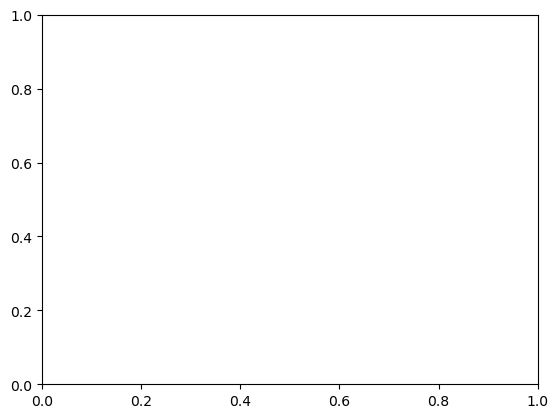

In [144]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(global_optm.xs[:,0],global_optm.xs[:,1])
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

In [145]:
#set K_warmup to 100 and run optimizer
K_warmup_new = 100
global_optm(bounds, tolerance, K_warmup_new, max_K)

   1: x0 = (-213.61, 468.51) -> converged at (-213.51, 470.46) with f =  66.79472511
   2: x0 = (-213.61, 468.51) -> converged at (-213.51, 470.46) with f =  66.79472511
   3: x0 = (-213.61, 468.51) -> converged at (-213.51, 470.46) with f =  66.79472511
   4: x0 = (-213.61, 468.51) -> converged at (-213.51, 470.46) with f =  66.79472511
   5: x0 = (-213.61, 468.51) -> converged at (-213.51, 470.46) with f =  66.79472511
   6: x0 = (-213.61, 468.51) -> converged at (-213.51, 470.46) with f =  66.79472511
   7: x0 = (-213.61, 468.51) -> converged at (-213.51, 470.46) with f =  66.79472511
   8: x0 = (-213.61, 468.51) -> converged at (-213.51, 470.46) with f =  66.79472511
   9: x0 = (-213.61, 468.51) -> converged at (-213.51, 470.46) with f =  66.79472511
  10: x0 = (-213.61, 468.51) -> converged at (-213.51, 470.46) with f =  66.79472511
  11: x0 = (-213.61, 468.51) -> converged at (-213.51, 470.46) with f =  66.79472511
  12: x0 = (-213.61, 468.51) -> converged at (-213.51, 470.46) wi

ValueError: could not broadcast input array from shape (5000,2) into shape (2,)